In [11]:
import pandas as pd
import numpy as np
import openpyxl
from haversine import haversine # 거리계산(input: from,to point/ output:거리(km))
import matplotlib.pyplot as plt

# user-defined modules
import _path

In [5]:
path  = _path.path
pathX = _path.pathX
pathY = _path.pathX

# 실거래 이력이 있는 주소지 반경 500m 내 학원 수

## 1. 실거래 이력이 있는 주소

In [7]:
filename = "V_LOCATION.xlsx"
V_LOCATION = pd.read_excel(path+"\\"+filename,sheet_name = 0, header=0)

## 2. 서울시 학원 정보 가져오기

In [6]:
filename = "서울특별시 학원 교습소정보_add.xlsx"  # 원 파일에 위경도 정보 붙임.
hakwon_all = pd.read_excel(pathX+"\\"+filename,sheet_name = 0, header=0)

In [8]:
HAKWON = hakwon_all[['학원지정번호','학원명','X','Y']]
HAKWON.columns = ['hakwon_id','hakown_nm','lng','lat']

In [ ]:
def count_hakwon(point_lat, point_lng):
    start = (point_lat, point_lng)
    count = 0
    margin = 0.06 # 약 600m
    
    hakwon_subset = HAKWON[(HAKWON.lat > point_lat-margin) & (HAKWON.lat < point_lat+margin) & (HAKWON.lng > point_lng-margin) & (HAKWON.lng < point_lng+margin)]
    hakwon_subset['goal'] = 0
    row_cnt = hakwon_subset.shape[0]
    if row_cnt == 0: # 반경 600m 내에 학원이 없는 경우
        return count
    else:
        hakwon_subset['goal'] = hakwon_subset.apply(lambda x: (x.lat, x.lng), axis=1)

        for idx, row in hakwon_subset.iterrows():
            dist = haversine(start, row.goal)
            # 반경 500m 내 학원 숫자 count
            if dist <= 0.5:
                count += 1
            else:
                continue   
        return count

In [ ]:
for idx_t, trans in V_LOCATION.iterrows():
    cnt = count_hakwon(trans.lat,trans.lng)
    if idx_t%100 == 0:
        print(idx_t, cnt)                                                               # monitoring
        print("---------------------------------------------------------------------")  # monitoring
    V_LOCATION.loc[idx_t,'hakwon_cnt'] = cnt

# 파일로 백업해둔 내용 load

In [10]:
filename = "V_LOCATION_edited_3.xlsx"
V_LOCATION = pd.read_excel(path+"\\"+filename,sheet_name = 0, header=0)

In [12]:
plt.rc('font', family='malgun gothic')
plt.rcParams['axes.unicode_minus'] = False  # 축 마이너스값 깨짐 방지용

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


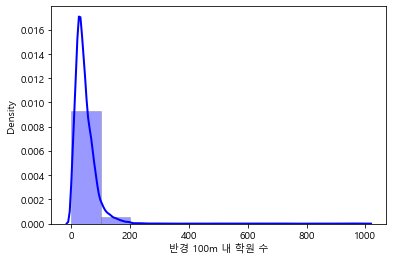

In [14]:
import seaborn as sns

ax = sns.distplot(V_LOCATION.hakwon_cnt, 
                      hist=True, 
                      kde=True, 
                      bins=10, 
                      color='blue', 
                      hist_kws={'edgecolor': 'gray'}, 
                      kde_kws={'linewidth': 2})
#ax.set_title('title')
ax.set_xlabel('반경 100m 내 학원 수')
ax.set_ylabel('Density')
plt.show()

In [16]:
V_LOCATION['hakwon_cnt_log'] = V_LOCATION['hakwon_cnt'].apply(lambda x: np.log(x+1))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


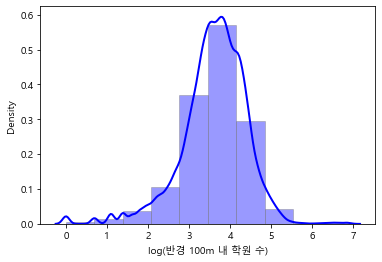

In [20]:
import seaborn as sns

ax = sns.distplot(V_LOCATION.hakwon_cnt_log, 
                      hist=True, 
                      kde=True, 
                      bins=10, 
                      color='blue', 
                      hist_kws={'edgecolor': 'gray'}, 
                      kde_kws={'linewidth': 2})
#ax.set_title('title')
ax.set_xlabel('log(반경 100m 내 학원 수)')
ax.set_ylabel('Density')
plt.show()

In [23]:
V_LOCATION.hakwon_cnt_log.describe()

count    78040.000000
mean         3.607742
std          0.796583
min          0.000000
25%          3.218876
50%          3.688879
75%          4.127134
max          6.912743
Name: hakwon_cnt_log, dtype: float64